In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving LT.NS.csv to LT.NS.csv


In [ ]:
df_input = pd.read_csv('LT.NS.csv')

In [ ]:
df_input.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-16,886.333008,908.533020,884.000000,904.767029,810.507874,3453009.0
1,2015-11-17,912.333008,915.000000,896.666992,901.166992,807.282898,2795227.0
2,2015-11-18,902.666992,912.666992,894.000000,896.299988,802.922974,2537497.0
3,2015-11-19,905.333008,910.000000,900.067017,905.966980,811.582825,1806705.0
4,2015-11-20,908.267029,915.599976,896.333008,911.232971,816.300232,2543665.0


In [ ]:
df_input['Date'] = pd.to_datetime(df_input['Date'])
df_input = df_input.set_index('Date')
df_input.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-16,886.333008,908.533020,884.000000,904.767029,810.507874,3453009.0
2015-11-17,912.333008,915.000000,896.666992,901.166992,807.282898,2795227.0
2015-11-18,902.666992,912.666992,894.000000,896.299988,802.922974,2537497.0
2015-11-19,905.333008,910.000000,900.067017,905.966980,811.582825,1806705.0
2015-11-20,908.267029,915.599976,896.333008,911.232971,816.300232,2543665.0


In [ ]:
df_input.isnull().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [ ]:
df_input.dropna(inplace=True)
df_input.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df_input.shape

(1233, 6)

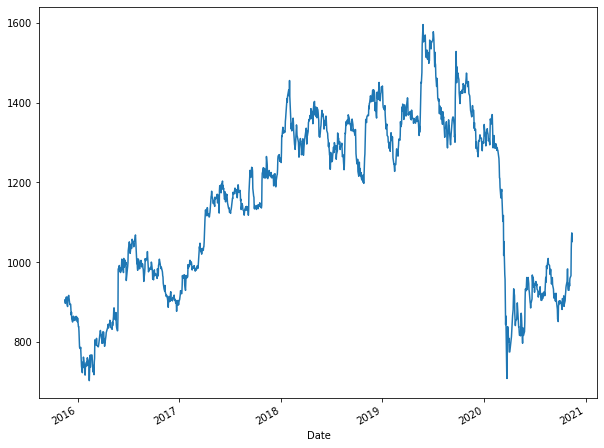

In [ ]:
df_input['Close'].plot()

In [ ]:
df_input = df_input[['Close','Open','Volume']]
df_input.head()

,Close,Open,Volume
Date,,,
2015-11-16,904.767029,886.333008,3453009.0
2015-11-17,901.166992,912.333008,2795227.0
2015-11-18,896.299988,902.666992,2537497.0
2015-11-19,905.966980,905.333008,1806705.0
2015-11-20,911.232971,908.267029,2543665.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ba1541b00>,
      dtype=object)

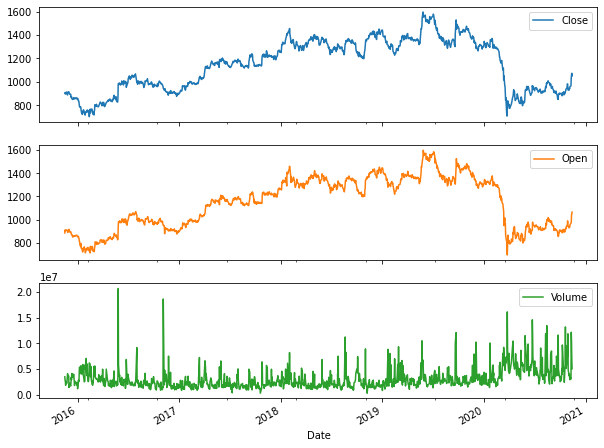

In [ ]:
df_input.plot(subplots=True)

In [ ]:
### ARIMA
df = df_input.copy()

In [ ]:
from statsmodels.tsa.stattools import kpss, adfuller
kpss(df['Close'],'ct')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(0.9485979388926559,
 0.01,
 23,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

In [ ]:
adfuller(df['Close'])

(-1.741374803774346,
 0.4099308033742763,
 0,
 1232,
 {'1%': -3.4356689751083374,
  '10%': -2.5680205519744055,
  '5%': -2.8638888336592387},
 10610.203311538193)

In [ ]:
kpss(df['Close'].diff(10).dropna(),'ct')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.05042392785826083,
 0.1,
 23,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

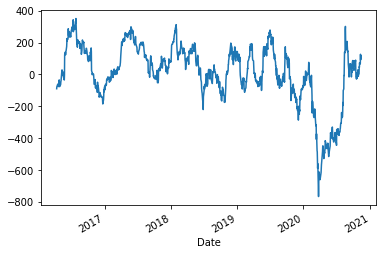

In [ ]:
df['Close'].diff(100).plot()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

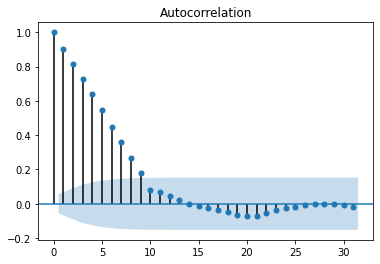

In [ ]:
plot_acf(df['Close'].diff(10).dropna());

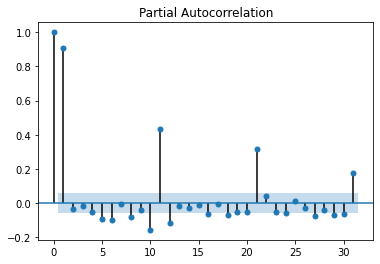

In [ ]:
plot_pacf(df['Close'].diff(10).dropna());

In [ ]:
#p=2, q=11, d=10

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(df['Close'],order=(2,2,2))
model_fit=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


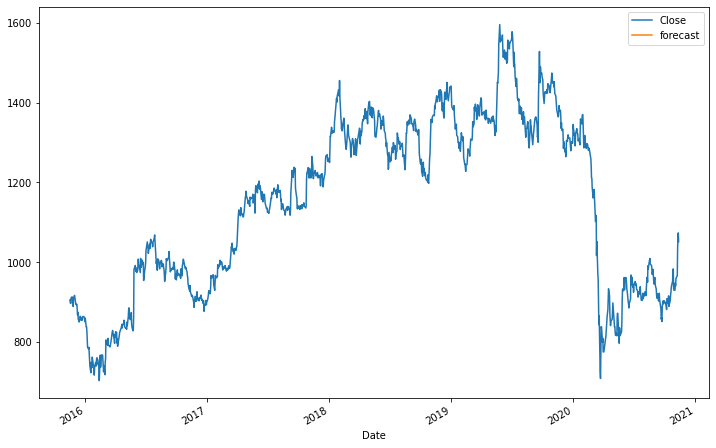

In [ ]:
df['forecast']=model_fit.predict(start=1200,end=1233,dynamic=True)
df[['Close','forecast']].plot(figsize=(12,8))

In [ ]:
## auto arima
!pip install pmdarima

     |████████████████████████████████| 1.5MB 8.9MB/s 
     |████████████████████████████████| 2.1MB 24.0MB/s 
     |████████████████████████████████| 8.7MB 19.5MB/s 
     |████████████████████████████████| 808kB 53.7MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: setuptools 50.3.2
    Uninstalling setuptools-50.3.2:
      Successfully uninstalled setuptools-50.3.2


In [ ]:
import pmdarima as pm

In [ ]:
model = pm.auto_arima(df['Close'],seasonal=False,start_p=0, start_q=0, max_order=4, test='adf', error_action='ignore', suppress_warnings=True, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10797.864, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10799.234, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10799.207, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10795.911, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10795.626, Time=0.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10797.239, Time=0.77 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10797.259, Time=1.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10800.658, Time=0.31 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=10800.708, Time=0.24 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.52 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=10793.670, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=10797.251, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=10797.279, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=10795.286, Time=0.31 sec
 ARIMA(1,1,2)(0,0,0)[0]  

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1233
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -5393.835
Date:                Mon, 16 Nov 2020   AIC                          10793.670
Time:                        07:57:45   BIC                          10809.019
Sample:                             0   HQIC                         10799.445
                               - 1233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8148      0.080    -10.200      0.000      -0.971      -0.658
ma.L1          0.8561      0.071     11.993      0.000       0.716       0.996
sigma2       371.7950      7.145     52.038      0.000     357.792     385.798
===================================================================================
Ljung-Box (Q):                       51.45   Jarque-Bera (JB):              2624.31
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               2.59   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train = df[(df.index.get_level_values(0) > '2015-11-16') & (df.index.get_level_values(0) <= '2020-09-01')]
test  = df[(df.index.get_level_values(0) > '2020-09-01')]

In [ ]:
model.fit(train['Close'])

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
test.shape

(52, 3)

In [ ]:
forecast = model.predict(n_periods=42, return_conf_int=False)

In [ ]:
forecast_df = pd.DataFrame(forecast[0], index=test.index, columns=['Preds'])

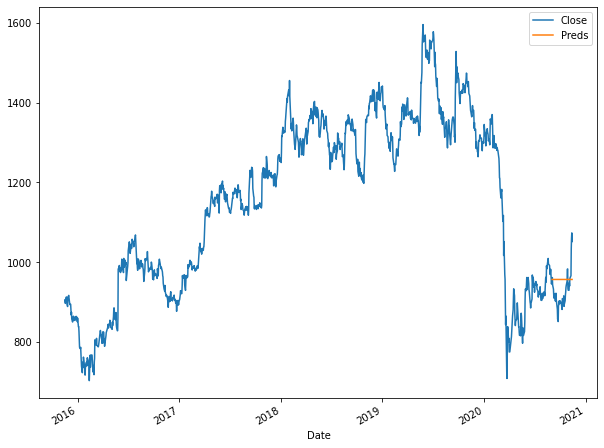

In [ ]:
pd.concat([df['Close'], forecast_df], axis=1).plot()

In [ ]:
### LSTM

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from IPython.display import Image, display
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [ ]:
df_input = df_input[['Close']]
df = df_input.copy()
df.head()

,Close
Date,
2015-11-16,904.767029
2015-11-17,901.166992
2015-11-18,896.299988
2015-11-19,905.966980
2015-11-20,911.232971


In [ ]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
features = df[:,0]
targets = df[:,0]
features = np.expand_dims(features,axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, shuffle=False)

In [ ]:
features

array([[0.2264341 ],
       [0.22240526],
       [0.21695855],
       ...,
       [0.39954135],
       [0.41492911],
       [0.39064447]])

In [ ]:
train_generator = TimeseriesGenerator(X_train, y_train, length=3, sampling_rate=1, batch_size=32) #5 days 
test_generator = TimeseriesGenerator(X_test, y_test, length=3, sampling_rate=1, batch_size=32) 

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, LeakyReLU

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(3,1), return_sequences=True))
model.add(LeakyReLU(alpha=0.5))
model.add(LSTM(64, return_sequences=True))
model.add(LeakyReLU(alpha=0.5))
model.add(Dropout(0.3))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min')

In [ ]:
model.compile(loss='mse',optimizer='adam', metrics='mae')

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 3, 128)            66560     
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 3, 128)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 3, 64)             49408     
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 3, 64)             0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 3, 64)             0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)               

In [ ]:
h = model.fit_generator(train_generator, epochs=20, validation_data=test_generator, shuffle=False, callbacks=[es])

Epoch 1/20
31/31 [==============================] - 1s 31ms/step - loss: 0.0556 - mae: 0.2062 - val_loss: 0.0707 - val_mae: 0.2321
Epoch 2/20
31/31 [==============================] - 0s 7ms/step - loss: 0.0627 - mae: 0.2160 - val_loss: 0.1385 - val_mae: 0.3572
Epoch 3/20
31/31 [==============================] - 0s 7ms/step - loss: 0.0720 - mae: 0.2322 - val_loss: 0.0607 - val_mae: 0.2335
Epoch 4/20
31/31 [==============================] - 0s 7ms/step - loss: 0.0346 - mae: 0.1531 - val_loss: 0.0152 - val_mae: 0.1150
Epoch 5/20
31/31 [==============================] - 0s 6ms/step - loss: 0.0095 - mae: 0.0804 - val_loss: 0.0028 - val_mae: 0.0406
Epoch 6/20
31/31 [==============================] - 0s 7ms/step - loss: 0.0062 - mae: 0.0614 - val_loss: 0.0032 - val_mae: 0.0440
Epoch 7/20
31/31 [==============================] - 0s 7ms/step - loss: 0.0054 - mae: 0.0564 - val_loss: 0.0021 - val_mae: 0.0336
Epoch 8/20
31/31 [==============================] - 0s 7ms/step - loss: 0.0048 - mae: 0.0

In [ ]:
preds = model.predict_generator(test_generator)

In [ ]:
df_pred = pd.concat([pd.DataFrame(preds),pd.DataFrame(X_test[:,1:][3:])],axis=1)

In [ ]:
df_pred.head()

,0
0,0.751725
1,0.742843
2,0.737007
3,0.720662
4,0.707157


In [ ]:
trans = scaler.inverse_transform(df_pred)

In [ ]:
df_final = df_input[preds.shape[0]*-1:]

In [ ]:
df_final['final'] = trans[:,0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
trans.shape

(244, 1)

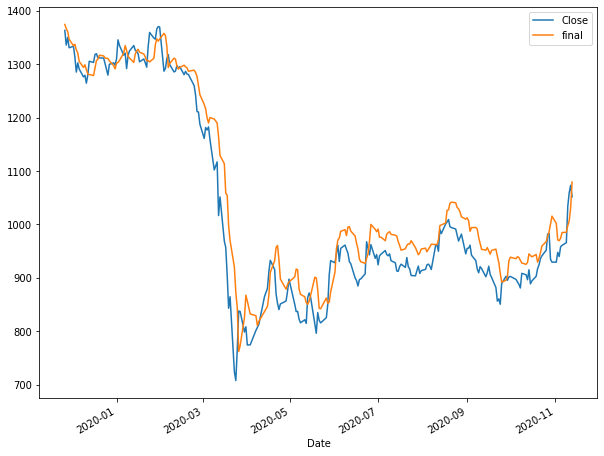

In [ ]:
df_final[['Close','final']].plot()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array
x_input = np.squeeze(features[-3:])
temp_input=list(x_input)
lst_output=[]
i=0
n_features=1
n_steps=3
while(i<30):
    
    if(len(temp_input)>3):
        x_input=array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        yhat = scaler.inverse_transform(yhat)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        yhat = scaler.inverse_transform(yhat)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[1096.0592]
1 day input [4.14929111e-01 3.90644474e-01 1.09605920e+03]
1 day output [[1698.37]]
2 day input [3.90644474e-01 1.09605920e+03 1.69837000e+03]
2 day output [[2433.8538]]
3 day input [1096.0592 1698.37   2433.8538]
3 day output [[3016.4458]]
4 day input [1698.37   2433.8538 3016.4458]
4 day output [[3015.5027]]
5 day input [2433.8538 3016.4458 3015.5027]
5 day output [[3014.9485]]
6 day input [3016.4458 3015.5027 3014.9485]
6 day output [[3014.725]]
7 day input [3015.5027 3014.9485 3014.725 ]
7 day output [[3014.7253]]
8 day input [3014.9485 3014.725  3014.7253]
8 day output [[3014.7256]]
9 day input [3014.725  3014.7253 3014.7256]
9 day output [[3014.7256]]
10 day input [3014.7253 3014.7256 3014.7256]
10 day output [[3014.7256]]
11 day input [3014.7256 3014.7256 3014.7256]
11 day output [[3014.7256]]
12 day input [3014.7256 3014.7256 3014.7256]
12 day output [[3014.7256]]
13 day input [3014.7256 3014.7256 3014.7256]
13 day output [[3014.7256]]
14 day input [3014.7256 3014.7

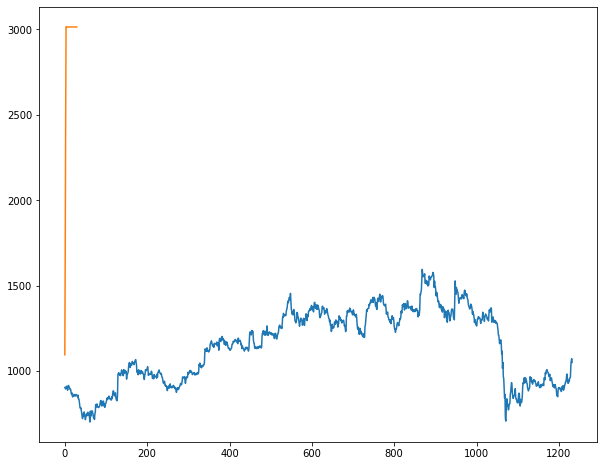

In [ ]:
plt.plot(df_input['Close'].values)
plt.plot(lst_output)